<a href="https://colab.research.google.com/github/SusanSagwa/LinearRegressionTask/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [37]:
m=0.5 #gradient
c=0.4 #y-ntercept
L=0.003 #learning rate
N= 100
epoch=25 #define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list=[]
epoch_count_list=[]

In [38]:
nairobi_office = pd.read_csv("nairobi_office.csv")
nairobi_office

,Area,TradePrice
0,30,40000000
1,80,130000000
2,110,400000000
3,50,180000000
4,65,100000000
...,...,...
406570,500,2300000
406571,115,610000
406572,230,7000000
406573,175,320000


In [39]:
xall = nairobi_office["Area"]
x = xall.head(100)
x

0      30
1      80
2     110
3      50
4      65
     ... 
95    640
96     65
97     40
98     95
99     40
Name: Area, Length: 100, dtype: int64

In [40]:
yall = nairobi_office["TradePrice"]
y = yall.head(100)
y

0       40000000
1      130000000
2      400000000
3      180000000
4      100000000
         ...    
95    1600000000
96      52000000
97      30000000
98     180000000
99      33000000
Name: TradePrice, Length: 100, dtype: int64

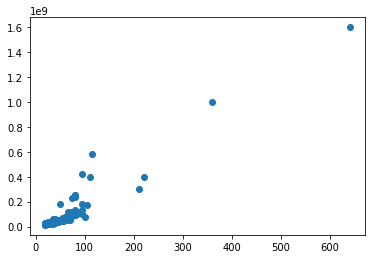

In [41]:
plt.scatter(x,y)

In [42]:
def mse(N,y,y_hat):
  return (1/N)*sum(y-y_hat)**2

In [43]:
def gradient_descent_fit(m,c,N,L):
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    y_hat = m*x+c

    #compute and arrest error for every iteration
    epoch_count_list=epoch_count_list[:]#trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error=mse(N,y,y_hat)
    #print('error ',epoch_error)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)

    #minimize the error function by computing partial derivatives
    D_m=(-2/N)*sum(x*(y-y_hat))
    #print('D_m ',D_m)
    D_c=(-2/N)*sum(y-y_hat)
    
    #Apply gradient descent formular to update both m and c into new values
    m=m-(L * D_m)
    #m=m-(2*X*())
    #print('new m is', m)
    c=c-(L * D_c)
  #you can print the final m and c after all iterations are done
  print("final m is: ",m," and final c is: ",c)
  #return final predicted value of Y-dependent variable
  return y_hat,epoch_count_list,epoch_error_list


In [44]:
#call gradient descent fit function
returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

final m is:  1.3589437622919471e+50  and final c is:  9.223335826957632e+47


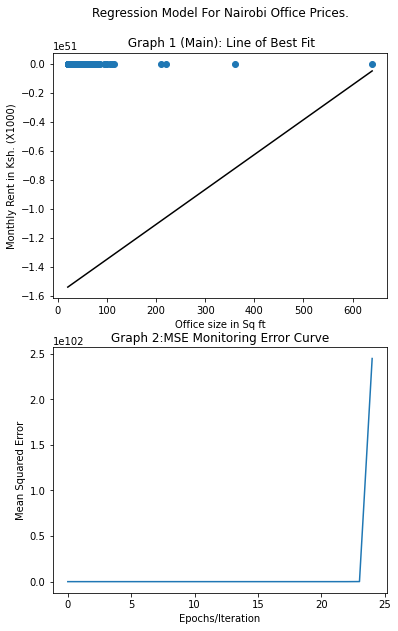

In [45]:
#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(x,y)

ax1.plot([min(x),max(x)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()